Proyecto 2-Parte II (core)
Proyecto 2: Análisis y Selección de Problema 

Dataset seleccionado:

***Weather Forecast Dataset***

Este dataset contiene información sobre el clima, incluyendo temperaturas, humedad, presión atmosférica y otros parámetros.
Lo que se buscara es predecir si llovera o no en base a esas mediciones buscando patrones ne las variables
Para ello se utilizara modelos de clasificacion como Random Forest o Xboost ya que no es un dataset muy complejo ni tiene
muchas columnas por lo que sera util modificar los parametros de estos modelos a modo de tener mas presicion

***Weather Forecast Dataset***

Con 2500 observaciones meteorológicas, es un conjunto de datos simple pero práctico para aprender a predecir las precipitaciones en función de diversas condiciones climáticas.
Perfecto para usar con bibliotecas de Python como scikit-learn, este conjunto de datos permite experimentar con algoritmos como regresión logística, árboles de decisión y bosques aleatorios.
La sencilla estructura del conjunto de datos lo hace accesible para quienes son nuevos en los problemas de clasificación y están interesados ​​en el análisis de datos meteorológicos.

Columnas: 
* Temperature: Temperatura
* Humidity: Humedad
* Wind_Speed: Velocidad del viento
* Cloud_Cover: Cobertura de nubes
* Pressure: Presión atmosférica
* Rain: Lluvia


# Parte I: Búsqueda y Análisis de Conjuntos de Datos

## 2.2) Análisis Estadístico Descriptivo:
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# cargar el dataset automobile data
data = pd.read_csv('../datasets/weather_forecast_data.csv')
print(data.shape)
data.info()
data.head(5)

(2500, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [3]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


## 2.3) Visualizaciones:
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).

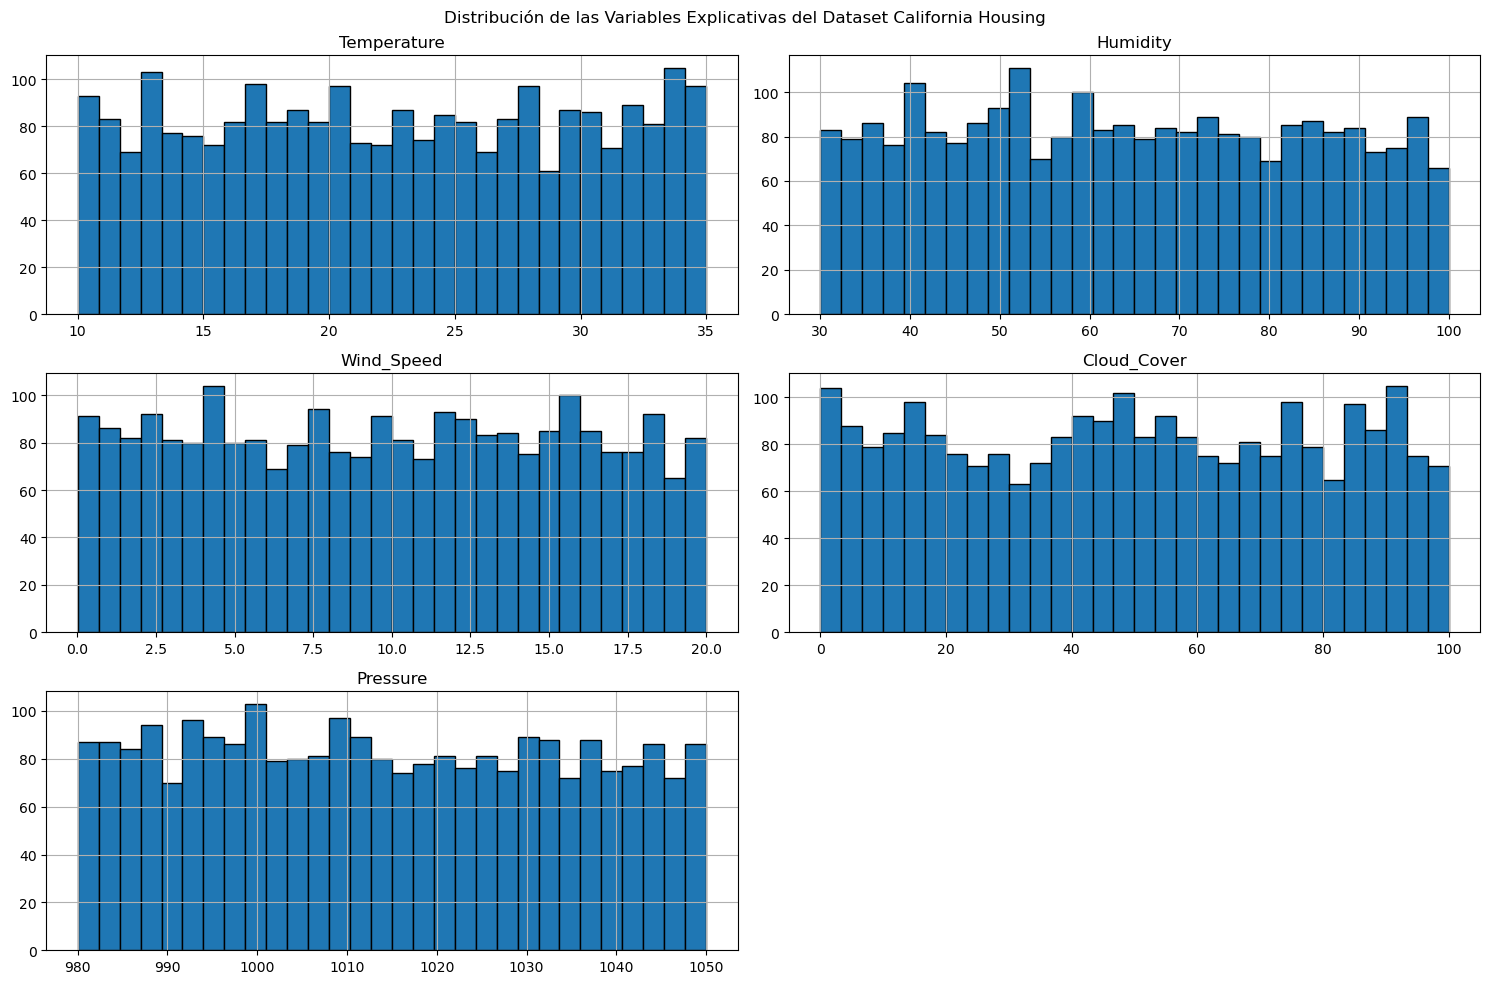

In [4]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

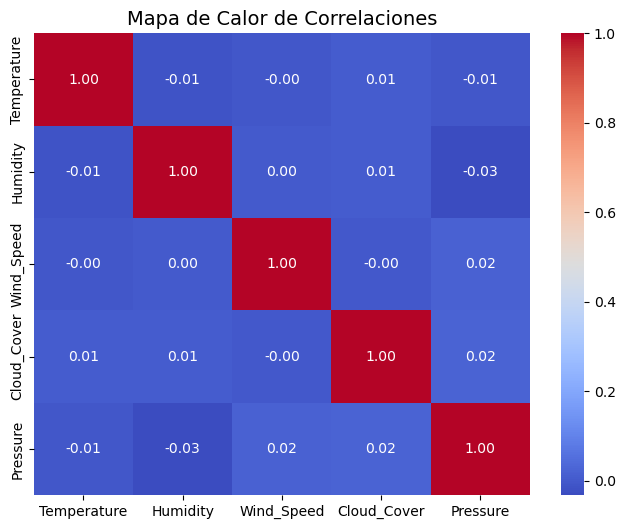

In [5]:
numeric_columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.show()

In [6]:
data['Rain'] = data['Rain'].astype('category')

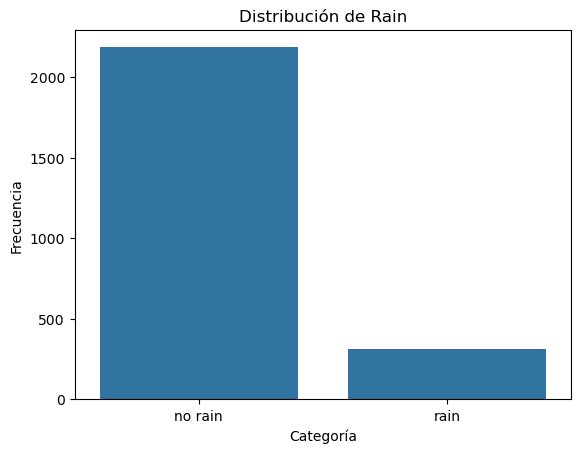

In [7]:
# Graficar la distribución de la columna Rain
sns.countplot(x='Rain', data=data)

# Agregar título y etiquetas
plt.title('Distribución de Rain')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Text(0.5, 1.0, 'Distribución de Pressure por Rain')

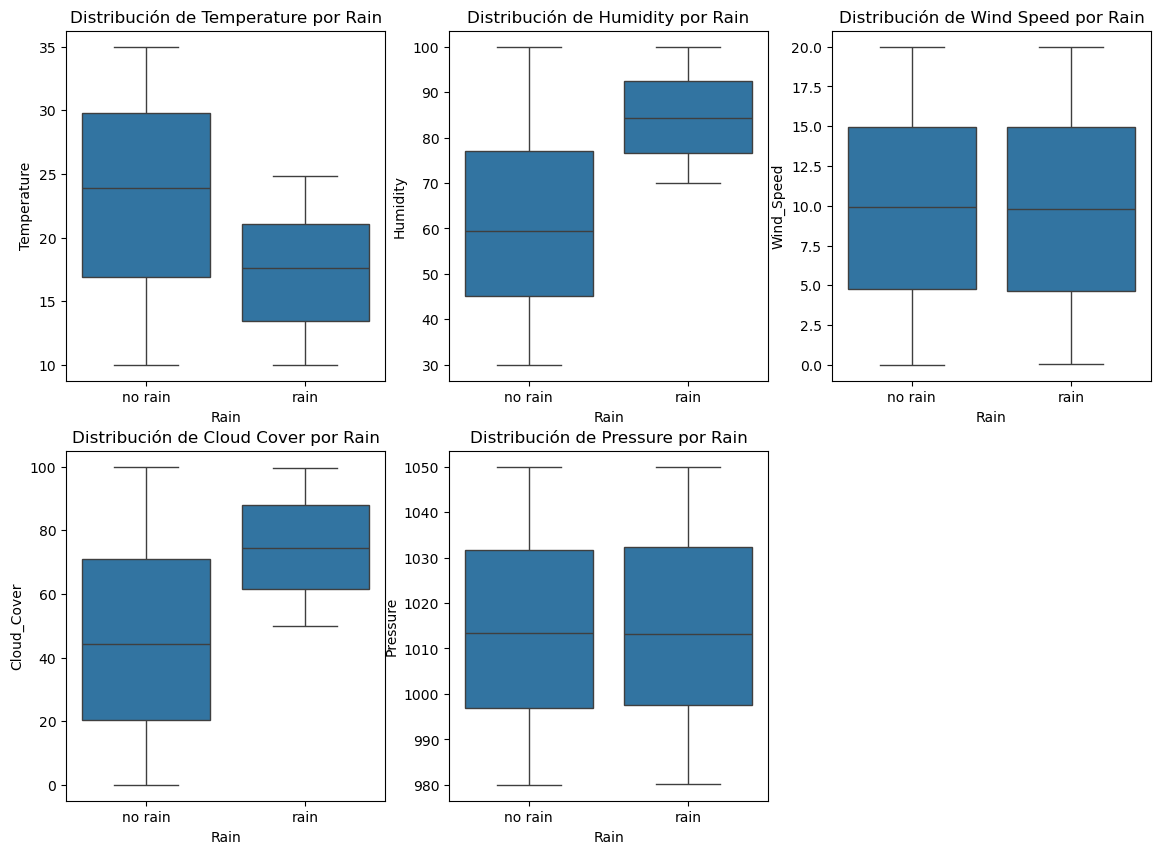

In [8]:
# Graficar boxplots para cada variable numérica con respecto a Rain
plt.figure(figsize=(14, 10))

# Boxplot para Temperature
plt.subplot(2, 3, 1)
sns.boxplot(x='Rain', y='Temperature', data=data)
plt.title('Distribución de Temperature por Rain')

# Boxplot para Humidity
plt.subplot(2, 3, 2)
sns.boxplot(x='Rain', y='Humidity', data=data)
plt.title('Distribución de Humidity por Rain')

# Boxplot para Wind_Speed
plt.subplot(2, 3, 3)
sns.boxplot(x='Rain', y='Wind_Speed', data=data)
plt.title('Distribución de Wind Speed por Rain')

# Boxplot para Cloud_Cover
plt.subplot(2, 3, 4)
sns.boxplot(x='Rain', y='Cloud_Cover', data=data)
plt.title('Distribución de Cloud Cover por Rain')

# Boxplot para Cloud_Cover
plt.subplot(2, 3, 5)
sns.boxplot(x='Rain', y='Pressure', data=data)
plt.title('Distribución de Pressure por Rain')

## 2.4) Identificación de Valores Nulos y Outliers:
Detectar valores nulos y discutir cómo podrían ser tratados.
Identificar outliers y evaluar su impacto potencial en el análisis.

In [9]:
print("Duplicados:", data.duplicated().sum())
print("Nulos: ", data.isnull().sum())


Duplicados: 0
Nulos:  Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Temperature  2500 non-null   float64 
 1   Humidity     2500 non-null   float64 
 2   Wind_Speed   2500 non-null   float64 
 3   Cloud_Cover  2500 non-null   float64 
 4   Pressure     2500 non-null   float64 
 5   Rain         2500 non-null   category
dtypes: category(1), float64(5)
memory usage: 100.3 KB


## 2.5) Resumen de Hallazgos:
* En este interesante dataset intentaremos predecir si llovera o no buscando patrones en las mediciones correspondientes


# Parte II: Preprocesamiento y Optimización

Objetivo: Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

## 1) Preprocesamiento de Datos

### Limpieza de Datos:
Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
Manejar los outliers mediante técnicas de filtrado o transformación.

In [11]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [12]:
print("Nulos: ", data.isnull().sum())

Nulos:  Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


### Transformación de Columnas:
* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
* Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [14]:
# Seleccionar columnas
X = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']] 
y = LabelEncoder().fit_transform(data['Rain']) 

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir columnas categóricas y numéricas
# Convertir la columna categórica 'Rain' a valores numéricos con LabelEncoder
numerical_columns = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']



# Creación de Pipelines:
* Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.
* Incluir todos los pasos de preprocesamiento en el pipeline.

In [15]:
# Definir transformaciones específicas para cada tipo de dato
preprocessor = ColumnTransformer(
    transformers=[    
        ('num', StandardScaler(), numerical_columns)  # Escalado numérico
    ]
)


## Parte 2: Selección de Técnica de Machine Learning

### Entrenamiento Inicial:
* Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).
* Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import optuna

In [24]:
models = {
    'KNN': Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', KNeighborsClassifier(n_neighbors=4))
    ]),
    'Decision Tree': DecisionTreeClassifier(max_depth=2, random_state=42 ),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=len(y[y == 0]) / len(y[y == 1])),
}

# Entrenar y evaluar los modelos con validación cruzada
results = {}

# Entrenar los modelos en el conjunto de entrenamiento
trained_models = {}
for name, model in models.items():
    print(f"Entrenando modelo: {name}")
    model.fit(X_train, y_train)  # Entrenamiento
    trained_models[name] = model

# Evaluar en conjunto de prueba
print("\nEvaluación en conjunto de prueba:")
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy en conjunto de prueba = {acc:.4f}")


Entrenando modelo: KNN
Entrenando modelo: Decision Tree
Entrenando modelo: Random Forest
Entrenando modelo: XGBoost

Evaluación en conjunto de prueba:
KNN: Accuracy en conjunto de prueba = 0.9587
Decision Tree: Accuracy en conjunto de prueba = 0.9347
Random Forest: Accuracy en conjunto de prueba = 0.9987
XGBoost: Accuracy en conjunto de prueba = 0.9987


In [25]:
print("\nValidación cruzada para todos los modelos:")
for name, model in models.items():
    print(f"Modelo: {name}")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Accuracy promedio (validación cruzada): {np.mean(scores):.4f}")
    print(f"Desviación estándar: {np.std(scores):.4f}\n")


Validación cruzada para todos los modelos:
Modelo: KNN
Accuracy promedio (validación cruzada): 0.9636
Desviación estándar: 0.0088

Modelo: Decision Tree
Accuracy promedio (validación cruzada): 0.9208
Desviación estándar: 0.0069

Modelo: Random Forest
Accuracy promedio (validación cruzada): 0.9988
Desviación estándar: 0.0016

Modelo: XGBoost
Accuracy promedio (validación cruzada): 0.9980
Desviación estándar: 0.0013



### Comparación de Modelos:
* Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, etc.).
* Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

In [19]:
# Modelo: KNN
model_knn = models['KNN']
model_knn.fit(X_train, y_train)  # Entrenar el modelo
y_pred_knn = model_knn.predict(X_test)  # Predicciones

# Evaluación: KNN
print("\nMétricas de KNN:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nReporte de Clasificación (KNN):")
print(classification_report(y_test, y_pred_knn))

# Modelo: Decision Tree
model_dt = models['Decision Tree']
model_dt.fit(X_train, y_train)  # Entrenar el modelo
y_pred_dt = model_dt.predict(X_test)  # Predicciones

# Evaluación: Decision Tree
print("\nMétricas de Decision Tree:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nReporte de Clasificación (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Modelo: Random Forest
model_rf = models['Random Forest']
model_rf.fit(X_train, y_train)  # Entrenar el modelo
y_pred_rf = model_rf.predict(X_test)  # Predicciones

# Evaluación: Random Forest
print("\nMétricas de Random Forest:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Modelo: XGBoost
model_xgb = models['XGBoost']
model_xgb.fit(X_train, y_train)  # Entrenar el modelo
y_pred_xgb = model_xgb.predict(X_test)  # Predicciones

# Evaluación: XGBoost
print("\nMétricas de XGBoost:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nReporte de Clasificación (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


Métricas de KNN:
Matriz de Confusión:
[[655   7]
 [ 24  64]]

Reporte de Clasificación (KNN):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       662
           1       0.90      0.73      0.81        88

    accuracy                           0.96       750
   macro avg       0.93      0.86      0.89       750
weighted avg       0.96      0.96      0.96       750


Métricas de Decision Tree:
Matriz de Confusión:
[[613  49]
 [  0  88]]

Reporte de Clasificación (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       662
           1       0.64      1.00      0.78        88

    accuracy                           0.93       750
   macro avg       0.82      0.96      0.87       750
weighted avg       0.96      0.93      0.94       750


Métricas de Random Forest:
Matriz de Confusión:
[[662   0]
 [  1  87]]

Reporte de Clasificación (Random Forest):
              precisi

## Parte 3: Optimización de Hiperparámetros

### GridSearchCV:
* Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
* Definir el espacio de búsqueda para los hiperparámetros relevantes.

In [ ]:
# Modelo: KNN
# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('classifier', KNeighborsClassifier())  # Modelo KNN
])

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'classifier__weights': ['uniform', 'distance'],  # Pesos
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']  # Métricas de distancia
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Predecir y evaluar
y_pred_opt = grid_search.best_estimator_.predict(X_test)

print("\nMatriz de Confusión (Optimizado):")
print(confusion_matrix(y_test, y_pred_opt))
print("\nReporte de Clasificación (Optimizado):")
print(classification_report(y_test, y_pred_opt))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}

Matriz de Confusión (Optimizado):
[[654   8]
 [ 11  77]]

Reporte de Clasificación (Optimizado):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       662
           1       0.91      0.88      0.89        88

    accuracy                           0.97       750
   macro avg       0.94      0.93      0.94       750
weighted avg       0.97      0.97      0.97       750



### Optuna:
* Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.

In [33]:
# Función objetivo para Optuna
def objective(trial):
    # Definir un rango reducido de hiperparámetros
    n_neighbors = trial.suggest_int('n_neighbors', 3, 7)  # Valores más pequeños
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'minkowski'])

    # Crear pipeline con los hiperparámetros sugeridos
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric))
    ])
    
    # Validación cruzada
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()  # Menos pliegues para rapidez
    return score

# Crear estudio con pocas iteraciones
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Solo 10 iteraciones

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", study.best_params)
print("Mejor puntuación de validación cruzada:", study.best_value)

# Entrenar el modelo con los mejores parámetros
best_params = study.best_params
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(
        n_neighbors=best_params['n_neighbors'], 
        weights=best_params['weights'], 
        metric=best_params['metric']
    ))
])
pipeline.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
accuracy = pipeline.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

[I 2024-11-25 11:59:26,725] A new study created in memory with name: no-name-a31e5179-7700-4eef-be04-557b04395d4b
[I 2024-11-25 11:59:26,856] Trial 0 finished with value: 0.9651503403118807 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.9651503403118807.
[I 2024-11-25 11:59:26,883] Trial 1 finished with value: 0.9662928718563251 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.9662928718563251.
[I 2024-11-25 11:59:26,918] Trial 2 finished with value: 0.962866256256021 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 1 with value: 0.9662928718563251.
[I 2024-11-25 11:59:27,028] Trial 3 finished with value: 0.9651503403118807 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.9662928718563251.
[I 2024-11-25 11:59:27,070] Trial 4 finished with value: 0.966864

Mejores parámetros encontrados: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'minkowski'}
Mejor puntuación de validación cruzada: 0.9668646271450614
Precisión en el conjunto de prueba: 0.9706666666666667


### Evaluación de Modelos Optimizados:
* Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
* Comparar el rendimiento del modelo optimizado con el modelo inicial.

In [34]:
# Crear el pipeline con los mejores parámetros
best_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('classifier', KNeighborsClassifier(
        n_neighbors=7,  # Mejor valor para n_neighbors
        weights='distance',  # Mejor valor para weights
        metric='minkowski'  # Mejor métrica
    ))
])

# Entrenar el modelo con los datos de entrenamiento
best_knn_pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_knn_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[654   8]
 [ 14  74]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       662
           1       0.90      0.84      0.87        88

    accuracy                           0.97       750
   macro avg       0.94      0.91      0.93       750
weighted avg       0.97      0.97      0.97       750



## Conclusiones:
* Los modelos utilizados en este trabajo fueorn aquullos orientados a la clasificacion
* Se utilizaron los modelos de: KNN classifier, Decision Tree Classifier, Random Forest Classifier y XBoosting Classifier
* De entre todos el knn classifier fue el que arrojo el resultado mas confiable, en segundo lugar el Desicion Tree y los demas tendian a sobreajustarse para este dataset en especifico ya que existia un problema de sesgo en la columna target
* Para el modelo de knn se utilizaron las tecnicas de optimizacion de hiperparametros y se pudo mejorar aun mas el rendimiento con ellos.